<a href="https://colab.research.google.com/github/LJMfintech/Financial_Data_Analysis/blob/main/DataAnalysisHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install wrds
!pip install numpy_financial

  Using cached numpy_financial-1.0.0-py3-none-any.whl.metadata (2.2 kB)
Using cached numpy_financial-1.0.0-py3-none-any.whl (14 kB)


In [2]:
import wrds
import numpy_financial as npf
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [3]:
conn = wrds.Connection()

Enter your WRDS username [root]:leeskku2025
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


# 1번 문제

In [4]:
lib_list = conn.list_libraries()
print(type(lib_list))
print(lib_list)

<class 'list'>
['aha_sample', 'ahasamp', 'audit', 'audit_audit_comp', 'audit_common', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all', 'boardex_trial', 'boardsmp', 'bvd_amadeus_trial', 'bvd_bvdbankf_trial', 'bvd_orbis_trial', 'bvdsamp', 'calcbench_trial', 'calcbnch', 'candid_samp', 'cboe', 'cboe_all', 'cboe_sample', 'cboesamp', 'cddsamp', 'ciq', 'ciq_capstrct', 'ciq_common', 'ciqsamp', 'ciqsamp_capstrct', 'ciqsamp_common', 'ciqsamp_keydev', 'ciqsamp_pplintel', 'ciqsamp_ratings', 'ciqsamp_transactions', 'ciqsamp_transcripts', 'cisdmsmp', 'columnar', 'comp', 'comp_execucomp', 'comp_global_daily', 'comp_na_daily_all', 'compsamp', 'compsamp_all', 'compsamp_snapshot', 'contrib', 'contrib_as_filed_financials', 'contrib_ceo_turnover', 'contrib_char_returns', 'contrib_corporate_culture', 'contrib_general', 'contrib_global_factor', 'contrib_intangible_value', 'contrib_kpss', 'contrib_liva', 'crsp', 'crsp_a_indexes', 'crsp_a_stock', 'crsp_a_t

In [5]:
conn.list_tables(library='comp')

['aco_amda',
 'aco_imda',
 'aco_indfnta',
 'aco_indfntq',
 'aco_indfntytd',
 'aco_indsta',
 'aco_indstq',
 'aco_indstytd',
 'aco_notesa',
 'aco_notesq',
 'aco_notessa',
 'aco_notesytd',
 'aco_pnfnda',
 'aco_pnfndq',
 'aco_pnfndytd',
 'aco_pnfnta',
 'aco_pnfntq',
 'aco_pnfntytd',
 'aco_transa',
 'aco_transq',
 'aco_transsa',
 'aco_transytd',
 'adsprate',
 'asec_amda',
 'asec_imda',
 'asec_notesa',
 'asec_notesq',
 'asec_transa',
 'asec_transq',
 'bank_aacctchg',
 'bank_adesind',
 'bank_afnd1',
 'bank_afnd2',
 'bank_afnddc1',
 'bank_afnddc2',
 'bank_afntind',
 'bank_funda',
 'bank_funda_fncd',
 'bank_fundq',
 'bank_fundq_fncd',
 'bank_iacctchg',
 'bank_idesind',
 'bank_ifndq',
 'bank_ifndytd',
 'bank_ifntq',
 'bank_ifntytd',
 'bank_names',
 'bank_namesq',
 'chars',
 'co_aacctchg',
 'co_aaudit',
 'co_acthist',
 'co_adesind',
 'co_adjfact',
 'co_afnd1',
 'co_afnd2',
 'co_afnddc1',
 'co_afnddc2',
 'co_afntind1',
 'co_afntind2',
 'co_ainvval',
 'co_amkt',
 'co_busdescl',
 'co_cotype',
 'co_f

In [6]:
country = conn.get_table(library='comp', table='g_secm', obs = 5)
country

,gvkey,iid,datadate,conm,ajexm,ajpm,isalrt,cshtrm,curcdm,prccm,...,dvpspm_fn,dvpsxm_fn,epf,exchg,isin,secstat,sedol,tpci,fic,loc
0,000005,01W,2006-01-31,<NA>,1.0,1.0,<NA>,<NA>,USD,10864.86,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,000005,01W,2006-02-28,<NA>,1.0,1.0,<NA>,<NA>,USD,10993.41,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,000005,01W,2006-03-31,<NA>,1.0,1.0,<NA>,<NA>,USD,11109.32,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,000005,01W,2006-04-30,<NA>,1.0,1.0,<NA>,<NA>,USD,11367.14,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,000005,01W,2006-05-31,<NA>,1.0,1.0,<NA>,<NA>,USD,11168.31,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
# a: 월별 기업 데이터
# b: 기업명 및 국가
# 기업(gvkey) 기준으로 매칭

data_set = conn.raw_sql("""select gvkey, iid, datadate, conm, ajexm, ajpm, cshtrm, curcdm, prccm, prchm, prclm, dvpspm, dvpsxm, fic

                          from comp.g_secm
                          where fic IN('GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR')
                          and datadate between '2020-03-01' and '2024-12-31'
                          """)
print(data_set.shape)



(1546685, 14)


In [8]:
data_set.head()

,gvkey,iid,datadate,conm,ajexm,ajpm,cshtrm,curcdm,prccm,prchm,prclm,dvpspm,dvpsxm,fic
0,001932,01W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,167128.582,GBP,27.59,32.445,23.82,0.0,0.526,GBR
1,001932,02W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,38145.786,ZAR,598.66,645.17,498.0,0.0,10.789,GBR
2,001932,03W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,57.605,EUR,30.98,37.265,25.65,0.0,0.579,GBR
3,001932,04W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,23539.937,GBP,27.385,32.53,23.685,0.0,0.526,GBR
4,001932,07W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,<NA>,CHF,34.44,34.44,34.44,0.0,0.616,GBR


In [9]:
data_set.to_csv('data_set.csv')

# 2번 문제

In [10]:
data_set = data_set.sort_values(['gvkey', 'datadate'])

# 2. 월별 수익률 계산 (조정종가 + 배당)
data_set['prccm_adj'] = data_set['prccm'] * data_set['ajexm']
data_set['prccm_adj_prev'] = data_set.groupby('gvkey')['prccm_adj'].shift(1)
data_set['div'] = data_set['dvpsxm'].fillna(0) if 'dvpsxm' in data_set.columns else 0
data_set['ret'] = (data_set['prccm_adj'] + data_set['div']) / data_set['prccm_adj_prev'] - 1

# 3. 시가총액 계산 (주가 × 발행주식수, 예: shares_outstanding 변수가 cshtrm, csho 등으로 제공된다 가정)
if 'cshtrm' in data_set.columns:
    data_set['mktcap'] = data_set['prccm'] * data_set['cshtrm']  # cshtrm NA시, quarterly/annual 데이터를 병합해서 채워넣기 가능
else:
    data_set['mktcap'] = np.nan # 결측 우선 처리, 이후 필요변수 병합해야 함

# 4. 국가-월별 동등가중(EW) 수익률
ew_ret = data_set.groupby(['fic', 'datadate'])['ret'].mean().reset_index(name='ew_ret')

# 5. 국가-월별 시가총액가중(VW) 수익률
def vw_avg(x):
    valid = (x['mktcap'] > 0) & (x['ret'].notnull())
    return np.average(x.loc[valid, 'ret'], weights=x.loc[valid, 'mktcap']) if valid.any() else np.nan

vw_ret = data_set.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# 6. 결과 출력/확인
print("기업별 월별 수익률 예시:")
# print(data_set[['gvkey', 'conm', 'datadate', 'ret']].head())
firm_monthly_ret = data_set.groupby(['gvkey', 'conm', 'datadate'])['ret'].mean().reset_index()
print(firm_monthly_ret.head())

print("기업별 시가총액 예시:")
# print(data_set[['gvkey', 'conm', 'datadate', 'mktcap']].head())
firm_monthly_mktcap = data_set.groupby(['gvkey', 'conm', 'datadate'])['mktcap'].sum().reset_index()
print(firm_monthly_mktcap.head())

print("\n국가별 EW 월별 수익률 예시:")
print(ew_ret.head())

print("\n국가별 VW 월별 수익률 예시:")
print(vw_ret.head())

/tmp/ipython-input-3851449813.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = data_set.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')


기업별 월별 수익률 예시:
    gvkey                      conm    datadate       ret
0  001932  BRITISH AMER TOBACCO PLC  2020-03-31  5.080814
1  001932  BRITISH AMER TOBACCO PLC  2020-04-30  4.185359
2  001932  BRITISH AMER TOBACCO PLC  2020-05-31   3.93544
3  001932  BRITISH AMER TOBACCO PLC  2020-06-30  3.906054
4  001932  BRITISH AMER TOBACCO PLC  2020-07-31  4.271441
기업별 시가총액 예시:
    gvkey                      conm    datadate           mktcap
0  001932  BRITISH AMER TOBACCO PLC  2020-03-31  28093859.601785
1  001932  BRITISH AMER TOBACCO PLC  2020-04-30   20603812.27123
2  001932  BRITISH AMER TOBACCO PLC  2020-05-31   10891445.12856
3  001932  BRITISH AMER TOBACCO PLC  2020-06-30   15244180.08371
4  001932  BRITISH AMER TOBACCO PLC  2020-07-31  15580227.419545

국가별 EW 월별 수익률 예시:
   fic    datadate      ew_ret
0  AUS  2020-03-31    1.367575
1  AUS  2020-04-30        6.18
2  AUS  2020-05-31    0.464202
3  AUS  2020-06-30    5.480709
4  AUS  2020-07-31  371.482904

국가별 VW 월별 수익률 예시:
   fic    

# 3번 문제

In [11]:
# datadate 컬럼을 datetime 타입으로 변환 (중요!)
data_set['datadate'] = pd.to_datetime(data_set['datadate'])

# 새 컬럼 'period' 생성
def classify_period(date):
    if pd.Timestamp('2020-03-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'COVID-19 Crisis Period'
    elif pd.Timestamp('2022-01-01') <= date <= pd.Timestamp('2024-12-31'):
        return 'Post-crisis Recovery Period'
    else:
        return 'Other'

data_set['period'] = data_set['datadate'].apply(classify_period)

# 결과 예시
print(data_set[['datadate', 'period']].drop_duplicates().head(15))

# 필요시 각 구간별 데이터 분리도 가능
covid_period    = data_set[data_set['period'] == 'COVID-19 Crisis Period']
recovery_period = data_set[data_set['period'] == 'Post-crisis Recovery Period']

         datadate                  period
0      2020-03-31  COVID-19 Crisis Period
23654  2020-04-30  COVID-19 Crisis Period
47299  2020-05-31  COVID-19 Crisis Period
71006  2020-06-30  COVID-19 Crisis Period
94795  2020-07-31  COVID-19 Crisis Period
118696 2020-08-31  COVID-19 Crisis Period
142688 2020-09-30  COVID-19 Crisis Period
166790 2020-10-31  COVID-19 Crisis Period
190990 2020-11-30  COVID-19 Crisis Period
215254 2020-12-31  COVID-19 Crisis Period
239774 2021-01-31  COVID-19 Crisis Period
264384 2021-02-28  COVID-19 Crisis Period
289108 2021-03-31  COVID-19 Crisis Period
314151 2021-04-30  COVID-19 Crisis Period
339295 2021-05-31  COVID-19 Crisis Period


In [12]:
data_set.head()

,gvkey,iid,datadate,conm,ajexm,ajpm,cshtrm,curcdm,prccm,prchm,prclm,dvpspm,dvpsxm,fic,prccm_adj,prccm_adj_prev,div,ret,mktcap,period
0,001932,01W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,167128.582,GBP,27.59,32.445,23.82,0.0,0.526,GBR,27.59,<NA>,0.526,<NA>,4611077.57738,COVID-19 Crisis Period
1,001932,02W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,38145.786,ZAR,598.66,645.17,498.0,0.0,10.789,GBR,598.66,27.59,10.789,21.089489,22836356.24676,COVID-19 Crisis Period
2,001932,03W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,57.605,EUR,30.98,37.265,25.65,0.0,0.579,GBR,30.98,598.66,0.579,-0.947284,1784.6029,COVID-19 Crisis Period
3,001932,04W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,23539.937,GBP,27.385,32.53,23.685,0.0,0.526,GBR,27.385,30.98,0.526,-0.099064,644641.174745,COVID-19 Crisis Period
4,001932,07W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,<NA>,CHF,34.44,34.44,34.44,0.0,0.616,GBR,34.44,27.385,0.616,0.280117,<NA>,COVID-19 Crisis Period


# 4번 문제

In [13]:
pd.set_option("display.precision", 3)
data_set.describe()



,datadate,ajexm,ajpm,cshtrm,prccm,prchm,prclm,dvpspm,dvpsxm,prccm_adj,prccm_adj_prev,div,ret,mktcap
count,1546685,1546685.0,1546685.0,1361150.0,1497458.0,1497458.0,1497458.0,1546685.0,1546685.0,1497458.0,1475538.0,1546685.0,1471965.0,1361150.0
mean,2022-09-15 09:44:40.907619072,1.421,1.258,149765.119,1151.217,1193.785,1098.886,2.31,2.37,9228.482,8904.755,2.37,<NA>,5390930.26
min,2020-03-31 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<NA>,0.0
25%,2021-06-30 00:00:00,1.0,1.0,320.3,3.71,4.0,3.45,0.0,0.0,3.715,3.71,0.0,<NA>,4339.688
50%,2022-09-30 00:00:00,1.0,1.0,6925.275,14.635,15.86,13.52,0.0,0.0,15.26,15.2,0.0,<NA>,362409.392
75%,2023-11-30 00:00:00,1.0,1.0,98372.127,98.121,105.76,90.4,0.0,0.0,121.0,119.3,0.0,<NA>,2193647.697
max,2024-12-31 00:00:00,3000.0,3000.0,112043152.6,260111111.111,260111111.111,260000000.0,15384.0,15384.0,567127500.0,567127500.0,15384.0,<NA>,8953707840.0
std,NaN,18.689,18.488,568181.931,213362.769,213401.502,213190.313,107.671,108.767,1567126.619,1530098.697,108.767,<NA>,47037082.671


In [14]:
# 10개국 리스트
country_list = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR']


# 10개국 데이터 필터링
data_10 = data_set[data_set['fic'].isin(country_list)]

# EW 수익률 계산
ew_ret = data_10.groupby(['fic', 'datadate'])['ret'].mean().reset_index(name='ew_ret')
# VW 수익률 계산 함수
def vw_avg(x):
    cond = (x['mktcap'] > 0) & x['ret'].notnull()
    if cond.any():
        return np.average(x.loc[cond,'ret'], weights=x.loc[cond,'mktcap'])
    else:
        return np.nan
vw_ret = data_10.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# 연월(Year-Month) 컬럼 추가 (datadate가 datetime 아니면 변환 필요)
data_10['datadate'] = pd.to_datetime(data_10['datadate'])
ew_ret['year_month'] = ew_ret['datadate'].dt.to_period('M')
vw_ret['year_month'] = vw_ret['datadate'].dt.to_period('M')

# 피벗(pivot)해서 국가별 row, 월별 수익률이 열이 되도록 변환
ew_pivot = ew_ret.pivot(index='fic', columns='year_month', values='ew_ret').reset_index()
vw_pivot = vw_ret.pivot(index='fic', columns='year_month', values='vw_ret').reset_index()

print("EW 수익률 (국가별 1행, 월별 열):")
print(ew_pivot.head(10))

print("\nVW 수익률 (국가별 1행, 월별 열):")
print(vw_pivot.head(10))

EW 수익률 (국가별 1행, 월별 열):
year_month  fic  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  \
0           AUS    1.368     6.18    0.464    5.481  371.483    5.827   
1           BRA    0.283   12.699   13.499    16.35   17.727   17.245   
2           CHN    0.314    0.179    0.183    0.219    0.262      0.2   
3           DEU    4.637    2.158    2.241    2.294     2.29    2.507   
4           FRA      NaN      NaN      NaN      NaN      NaN      NaN   
5           GBR    5.054   22.298   302.38    1.636    6.382    1.774   
6           IND    8.077    0.198    0.084    0.273    0.102    0.183   
7           JPN    2.693     2.04    2.135     2.06   65.184    3.469   
8           TUR    0.079   35.364   31.965   26.497    23.47   26.024   
9           ZAF    1.572     2.71    2.388    2.292   36.222    2.134   

year_month  2020-09  2020-10  2020-11  ...  2024-03  2024-04  2024-05  \
0             0.234   66.562    2.633  ...    0.845    4.051      4.2   
1            16.674   17.90

/tmp/ipython-input-3169170650.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = data_10.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')


In [18]:
from scipy.stats import skew, kurtosis

# 기존: country_list, data_10 등 기존 코드 활용

# 월별 수익률 생성 이후 추가할 summary 함수 정의
def calc_summary_stats(x):
    return pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'autocorr': x.autocorr(lag=1),
        'skewness': skew(x.dropna()),
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True)
    })

# 국가별 & 월별 수익률 계산 (기존 코드 참고)
ew_ret = data_10.groupby(['fic', 'datadate'])['ret'].mean().reset_index(name='ew_ret')
vw_ret = data_10.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# 그룹별 각 수익률의 summary statistics 계산
ew_stats = ew_ret.groupby('fic')['ew_ret'].apply(calc_summary_stats).reset_index()
vw_stats = vw_ret.groupby('fic')['vw_ret'].apply(calc_summary_stats).reset_index()

print("EW 수익률 국가별 summary stats:")
print(ew_stats.head(20))

print("VW 수익률 국가별 summary stats:")
print(vw_stats.head(20))

EW 수익률 국가별 summary stats:
    fic          level_1   ew_ret
0   AUS             mean  131.847
1   AUS           median    4.021
2   AUS              std  698.885
3   AUS              min    0.211
4   AUS              max  5205.05
5   AUS         autocorr   -0.017
6   AUS         skewness    6.829
7   AUS  excess_kurtosis   46.666
8   BRA             mean    4.977
9   BRA           median    1.622
10  BRA              std    6.576
11  BRA              min    0.283
12  BRA              max   22.812
13  BRA         autocorr     0.84
14  BRA         skewness    1.596
15  BRA  excess_kurtosis    0.904
16  CHN             mean    0.183
17  CHN           median    0.182
18  CHN              std    0.047
19  CHN              min    0.063
VW 수익률 국가별 summary stats:
    fic          level_1  vw_ret
0   AUS             mean   2.126
1   AUS           median   1.510
2   AUS              std   3.241
3   AUS              min  -0.326
4   AUS              max  21.374
5   AUS         autocorr   0.038
6  

/tmp/ipython-input-886428757.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = data_10.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1158: Runtim

# 5번 문제

In [24]:
# Developed/Emerging 국가 리스트
developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

data_10['group'] = data_10['fic'].apply(
    lambda x: 'Developed' if x in developed else ('Emerging' if x in emerging else np.nan))
filtered = data_10[data_10['group'].notnull()]

# EW 수익률 계산 (datadate별)
ew_ret = filtered.groupby(['group', 'fic', 'datadate'], as_index=False)['ret'].mean()
ew_ret = ew_ret.rename(columns={'ret': 'ew_ret'})

# VW 수익률 계산 (datadate별)
def vw_avg(x):
    cond = (x['mktcap'] > 0) & x['ret'].notnull()
    if cond.any():
        return np.average(x.loc[cond, 'ret'], weights=x.loc[cond, 'mktcap'])
    else:
        return np.nan

vw_ret = filtered.groupby(['group', 'fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# ---- summary statistics 함수 정의 (agg 활용) ---- #
summary_funcs = {
    'mean': 'mean',
    'median': 'median',
    'std': 'std',
    'min': 'min',
    'max': 'max',
    'autocorr': lambda x: x.autocorr(lag=1) if len(x.dropna()) > 1 else np.nan,
    'skewness': lambda x: skew(x.dropna()) if len(x.dropna()) > 2 else np.nan,
    'excess_kurtosis': lambda x: kurtosis(x.dropna(), fisher=True) if len(x.dropna()) > 3 else np.nan
}

ew_stats = ew_ret.groupby(['group', 'fic'])['ew_ret'].agg(**summary_funcs).reset_index()
vw_stats = vw_ret.groupby(['group', 'fic'])['vw_ret'].agg(**summary_funcs).reset_index()

ew_stats = ew_stats.replace([np.inf, -np.inf], np.nan).dropna() #inf, -inf 값을 NaN으로 대체 후 Nan 전체 제거
vw_stats = vw_stats.replace([np.inf, -np.inf], np.nan).dropna()

print("EW summary 국가별 샘플", ew_stats.head())
print("VW summary 국가별 샘플", vw_stats.head())

# 그룹별 평균 summary stats (Developed/Emerging)
ew_stats_grp = ew_stats.groupby('group').mean(numeric_only=True)
vw_stats_grp = vw_stats.groupby('group').mean(numeric_only=True)
print("EW 그룹별 평균 summary stats:")
print(ew_stats_grp)
print("VW 그룹별 평균 summary stats:")
print(vw_stats_grp)

EW summary 국가별 샘플        group  fic       mean  median         std    min          max  \
0  Developed  AUS    131.847   4.021     698.885  0.211      5205.05   
1  Developed  DEU      5.632   3.051      12.561  2.155       81.727   
4  Developed  JPN  51450.374   7.539  391773.251   2.04  2983664.217   
5   Emerging  BRA      4.977   1.622       6.576  0.283       22.812   
6   Emerging  CHN      0.183   0.182       0.047  0.063        0.314   

   autocorr  skewness  excess_kurtosis  
0    -0.017     6.829           46.666  
1    -0.034     5.261           26.746  
4    -0.018     7.417           53.018  
5      0.84     1.596            0.904  
6    -0.087     0.289            1.459  
VW summary 국가별 샘플        group  fic    mean  median     std     min     max  autocorr  skewness  \
0  Developed  AUS   2.126   1.510   3.241  -0.326  21.374     0.038     5.096   
1  Developed  DEU   0.263   0.254   0.123  -0.006   0.621     0.452     0.383   
4  Developed  JPN  40.844  37.088  12.135 

/tmp/ipython-input-1271708907.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = filtered.groupby(['group', 'fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1

# 6번 문제

In [28]:
# 국가, 월별 수익률 피벗테이블 생성
pivot = data_10.pivot_table(index='datadate', columns='fic', values='ret')


# 기간 구분
periods = {
    'covid_crisis': ('2020-03', '2021-12'),
    'post_recovery': ('2022-01', '2024-12')
}

developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

corr_matrices = {}
for label, (start, end) in periods.items():
    mask = (pivot.index >= start) & (pivot.index <= end)
    corr_matrices[label] = pivot.loc[mask].corr()
    print(f"\n[{label} 기간 국가별 상관행렬]:")
    print(corr_matrices[label])

    dev_corr = corr_matrices[label].loc[developed, developed]
    emg_corr = corr_matrices[label].loc[emerging, emerging]

    dev_vals = dev_corr.values[np.triu_indices(len(developed), 1)]
    emg_vals = emg_corr.values[np.triu_indices(len(emerging), 1)]

    print(f"[{label}] 선진국 평균 상관계수: {np.nanmean(dev_vals):.3f}")
    print(f"[{label}] 신흥국 평균 상관계수: {np.nanmean(emg_vals):.3f}")


[covid_crisis 기간 국가별 상관행렬]:
fic    AUS    BRA    CHN    DEU  FRA    GBR    IND    JPN    TUR    ZAF
fic                                                                    
AUS  1.000  0.310 -0.337 -0.017  NaN  0.856 -0.056  0.011 -0.233 -0.031
BRA  0.310  1.000 -0.272 -0.135  NaN  0.269 -0.271  0.123  0.242  0.261
CHN -0.337 -0.272  1.000  0.601  NaN -0.350  0.175  0.355 -0.427  0.045
DEU -0.017 -0.135  0.601  1.000  NaN -0.062  0.017 -0.100 -0.658 -0.055
FRA    NaN    NaN    NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN
GBR  0.856  0.269 -0.350 -0.062  NaN  1.000 -0.014 -0.100 -0.042 -0.125
IND -0.056 -0.271  0.175  0.017  NaN -0.014  1.000 -0.022 -0.096 -0.090
JPN  0.011  0.123  0.355 -0.100  NaN -0.100 -0.022  1.000  0.016  0.717
TUR -0.233  0.242 -0.427 -0.658  NaN -0.042 -0.096  0.016  1.000  0.244
ZAF -0.031  0.261  0.045 -0.055  NaN -0.125 -0.090  0.717  0.244  1.000
[covid_crisis] 선진국 평균 상관계수: 0.098
[covid_crisis] 신흥국 평균 상관계수: -0.019

[post_recovery 기간 국가별 상관행렬]:
fic    A

# 7번 문제

In [39]:
def summary_func(x):
    result = pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'skewness': skew(x.dropna()) if len(x.dropna()) > 2 else 0,
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True) if len(x.dropna()) > 3 else 0
    })
    return result.fillna(0)  # 계산한 시리즈에서도 nan을 0으로 대체

data_10['datadate'] = pd.to_datetime(data_10['datadate'])
data_10['period'] = None
data_10.loc[(data_10['datadate'] >= '2020-03-01') & (data_10['datadate'] <= '2021-12-31'), 'period'] = 'COVID-19'
data_10.loc[(data_10['datadate'] >= '2022-01-01') & (data_10['datadate'] <= '2024-12-31'), 'period'] = 'Recovery'
data_period = data_10[data_10['period'].notnull()]

# 국가별
country_stats = data_period.groupby('fic')['ret'].apply(summary_func).unstack().reset_index()
country_stats = country_stats.fillna(0)
print("국가별 summary statistics")
print(country_stats)

# 기간별
period_stats = data_period.groupby('period')['ret'].apply(summary_func).unstack().reset_index()
period_stats = period_stats.fillna(0)
print("\n기간별 summary statistics")
print(period_stats)

# 그룹별
group_stats = data_period.groupby('group')['ret'].apply(summary_func).unstack().reset_index()
group_stats = group_stats.fillna(0)
print("\n그룹별 summary statistics")
print(group_stats)

/tmp/ipython-input-4162172355.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return result.fillna(0)  # 계산한 시리즈에서도 nan을 0으로 대체
/tmp/ipython-input-4162172355.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return result.fillna(0)  # 계산한 시리즈에서도 nan을 0으로 대체


국가별 summary statistics
   fic       mean  median        std    min        max  skewness  \
0  AUS    124.054   0.000  2.437e+04 -1.000  7.843e+06   268.337   
1  BRA      4.880  -0.001  1.699e+02 -1.000  1.088e+04    50.110   
2  CHN      0.181   0.000  2.771e+00 -0.999  1.119e+03   241.427   
3  DEU      5.637   0.000  4.660e+02 -1.000  1.062e+05   201.549   
4  FRA      0.000   0.000  0.000e+00  0.000  0.000e+00     0.000   
5  GBR      0.000   0.000  0.000e+00  0.000  0.000e+00     0.000   
6  IND      7.236   0.000  1.899e+03 -1.000  8.182e+05   371.244   
7  JPN  51794.365   0.002  2.528e+07 -0.998  1.234e+10   488.152   
8  TUR    142.527   0.017  6.575e+03 -1.000  4.677e+05    57.141   
9  ZAF    186.633   0.000  2.297e+04 -0.996  3.097e+06   134.172   

   excess_kurtosis  
0        79407.353  
1         2657.366  
2        91425.372  
3        42409.289  
4            0.000  
5            0.000  
6       148454.723  
7       238290.000  
8         3419.554  
9        18079.423

/tmp/ipython-input-4162172355.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return result.fillna(0)  # 계산한 시리즈에서도 nan을 0으로 대체
/tmp/ipython-input-4162172355.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return result.fillna(0)  # 계산한 시리즈에서도 nan을 0으로 대체



그룹별 summary statistics
       group    mean  median       std  min        max  skewness  \
0  Developed   0.000     0.0     0.000  0.0  0.000e+00     0.000   
1   Emerging  11.696     0.0  3830.038 -1.0  3.097e+06   685.206   

   excess_kurtosis  
0            0.000  
1       538160.358  


/tmp/ipython-input-4162172355.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return result.fillna(0)  # 계산한 시리즈에서도 nan을 0으로 대체


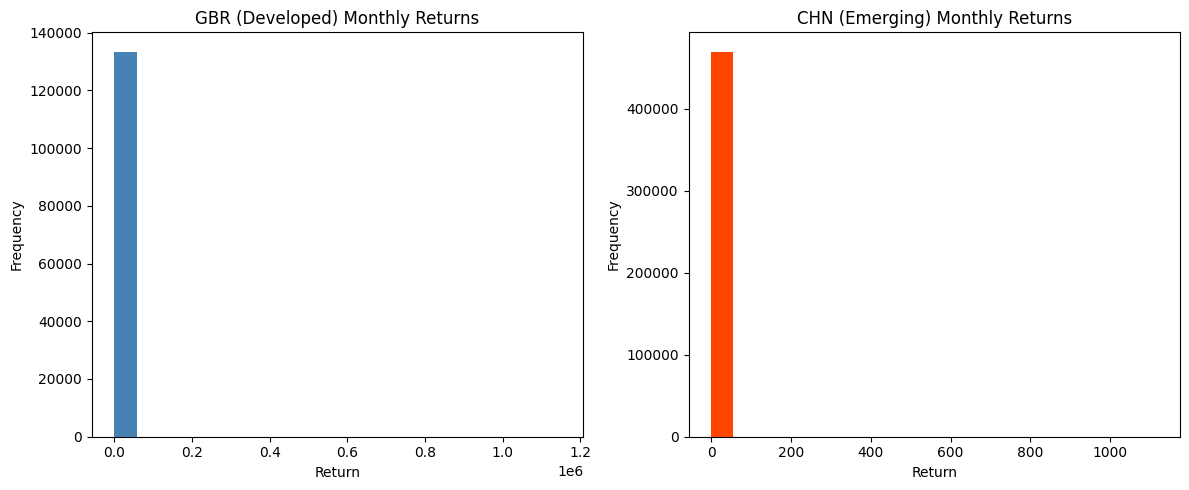

In [38]:
# GBR, CHN 각각의 수익률 데이터 준비 (inf/nan 제거)
gbr_ret = data_10[data_10['fic'] == 'GBR']['ret']
gbr_ret = gbr_ret.replace([np.inf, -np.inf], np.nan).dropna()

chn_ret = data_10[data_10['fic'] == 'CHN']['ret']
chn_ret = chn_ret.replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(gbr_ret, bins=20, color='steelblue')
plt.title('GBR (Developed) Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(chn_ret, bins=20, color='orangered')
plt.title('CHN (Emerging) Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()